# Machine learning and metagenomics to study microbial communities

## Luis Pedro Coelho

- [@luispedrocoelho](https://twitter.com/luispedrocoelho)
- http://luispedro.org

## Microbial communities

_Definition_: A microbial community is just many small organisms living together.

Most often, we study _bacteria_ and _archea_ (prokaryotes, but some people do not like that word as it's not a monophyletic group).

Less often, microeukaryotes.

![Q](Q.png) What are the (wet-)lab tools to analyse microbial communities?

# Wetlab methods

- Sequencing
    - WGS (metagenomics)
    - Amplicon (16S, typically; but other genes too)
    - Transcriptomics
- Imaging
- Metaproteomics
- ...

The biggest reason why we study prokaryotes more than eukaryotes is that it's easier.

# Which environments are typically analysed?

- Host associated microbiomes (with clinical implications)
- Environmental samples (ocean, lakes, soil)
- Wastewater treatment plants
- Cheese
- ...

## Introduction to metagenomics analysis

(Most of this also applies to amplicon and metatranscriptomics sequencing)

1. Collect sample
2. Extract DNA (or RNA)
3. Perhaps more manipulations (amplicon, RNA -> cDNA, ...)
4. Send sample to sequencing centre
5. Sequencing happens
6. You get FASTQ files

#### Alternative pipeline

1. Download FASTQ files from ENA (EBI) or SRA

# Raw metagenomics data (FastQ Files)

- We cannot process metagenomics data in a 1-day course: too much computation, too many tools to introduce; not enough time.
- We can, however, do some functional data analysis if we start with preprocessed data.
- Still, let's discuss what can be done with these data and how they are processed in general.

# What does a FASTQ file look like?


    @HWI-D00647:25:C4P50ANXX:1:1101:1914:1994:0:N:0:AGGCAGAAAAGGCTAT
    TAAAAGCATCAAAGTTTTTATAAATTTTTTATCCAACTTAAACATTTTTTTCCTCCTAA
    +
    <>BGGGGGCGGGGGGGGGGG>GGGGGGGGGGGEGGGGEGGGGGGGGGGGGGG>GGBGGG
    @HWI-D00647:25:C4P50ANXX:1:1101:4595:1998:0:N:0:AGGCAGAAAAGGCTAT
    CTCTATCGCACGCTCCAGGCGCGCTATCCCCAGGCGATAATCGATGTGATGGCACCGGC
    +
    :>BGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGDGGGGFGGGGGGGGGGGGGGGG

![Q](Q.png)
How would you process these data?

# Gene catalog approach

![Gene catalog](./MOCAT_TARA.png)



Tools for this process:

- [MOCAT](http://vm-lux.embl.de/~kultima/MOCAT/)
- [ngless](https://ngless.rtfd.io)

# Existing catalogs

- Ocean
- Host-associated: human gut, mouse gut, pig gut, human skin
- ...

More will come in the future.

# Outputs of metagenomics processing

Feature tables: (sample x feature) 

- taxonomic: features are species abundances or genus abundance ...
- functional: features are gene groups, gene families


Note: all of these are **relative abundances**. Sequencing can never give you absolute abundances by itself.


It is the feature tables that are the input to the machine learning and other analyses.


# Problems

- [supervised] Colorectal cancer detection from fecal samples
- [unsupervised] Automated inference of species existence (mOTUs/CAGs/...)
- [supervised/unsupervised] As a **scientific tool** for relationship inferrence
- ...



# Colorectal Cancer (CRC) Detection

This section is based on work from ([Zeller et al., 2014](http://onlinelibrary.wiley.com/doi/10.15252/msb.20145645/abstract)).

Problem:

> Can we use the microbiome present in a fecal sample as a test for CRC?

Background:

- CRC has a low survival rate if detected late, but high if detected early enough
- Current tests are either invasive and uncomfortable (colonoscopy) or weak in power (occult blood tests).
- Some in vitro research had already hinted at a possible microbiome involvement

# Classification problem

1. Get samples from healthy individuals and patients
2. Generate data from both groups
3. Build a classifier

# Practical I

(These slides are adapted from Georg Zeller's work).

### Mechanics of Jupyter notebooks

- You can run this *cell* by typing CTRL+ENTER or from the menu.
- `?` after an object/function for help
- *Restart* when stuck

In [1]:
print("Hello World")

Hello World


You can run the cells out of order, but **variables** are preserved.

Another way of saying it is that you are manipulating an environment underneath

In [2]:
name = "Luis"

In [3]:
print("Hello {}".format(name))

Hello Luis


In [4]:
name = 'Anna'

In [5]:
import pandas as pd
import numpy as np

## Some basic imports

These are general imports for data analysis in Python

In [6]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn-white')


A magic command to make plots appear *inline*:

In [7]:
# statement for jupyter notebook (not for python)
% matplotlib inline

In [8]:
# scikit-learn is a very comprehensive for machine learning
# not really for deep learning but for all other machine learning problems
# all most basic algorithms implemented
from sklearn import metrics
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Getting the data

In this case, the data is already in the form of feature tables.

How to obtain these feature table from raw data is outside the scope of this tutorial. You can, however, read a tutorial on how to do so on the [NGLess website](http://ngless.embl.de/_static/gut-metagenomics-tutorial-presentation/gut_specI_tutorial.html).

In [29]:
features = pd.read_table('http://www.bork.embl.de/~zeller/mlbc_data/FR-CRC_N114_feat_specIclusters.tsv')

In [30]:
print(features.shape)

(1754, 114)


In [31]:
features

,CCIS27304052ST-3-0,CCIS15794887ST-4-0,CCIS16561622ST-4-0,CCIS79210440ST-3-0,CCIS82507866ST-3-0,CCIS98482370ST-3-0,CCIS00281083ST-3-0,CCIS32452666ST-4-0,CCIS94417875ST-3-0,CCIS27927933ST-4-0,...,CCIS88007743ST-4-0,CCIS51595129ST-4-0,CCIS09568613ST-4-0,CCIS07539127ST-4-0,CCIS41692898ST-4-0,CCIS44093303ST-4-0,CCIS00146684ST-4-0,CCIS78100604ST-4-0,CCIS48174381ST-4-0,CCIS88317640ST-4-0
UNMAPPED,79082.683473,81853.405666,117405.355871,71157.452002,52682.752421,84132.149019,41644.859588,66822.073657,129563.779300,110146.784420,...,42914.243981,89241.975086,138238.561647,119779.117522,66247.224256,28792.834362,113600.263485,61491.206186,64769.653221,108496.634255
Methanoculleus marisnigri [h:1],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Methanococcoides burtonii [h:10],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Thermococcus kodakarensis [h:100],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Victivallis vadensis [h:1000],0.000000,0.000000,0.992403,0.000000,36.858255,0.000000,0.000000,0.000000,13.042339,0.000000,...,1.003101,31.267760,165.597819,0.000000,0.000000,0.000000,0.978909,0.000000,0.000000,0.000000
Gemmatimonas aurantiaca [h:1001],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fibrobacter succinogenes [h:1002],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
unnamed Verrucomicrobiae bacterium DG1235 [u:1003],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Opitutus terrae [h:1004],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Coraliomargarita akajimensis [h:1005],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Feature normalization

Here is what we do:

1. Convert to relative abundances
2. Remove low abundance features
3. Log transform the features
4. Whiten the data

=> whiten = substract the mean and divide by standard deviation

![Q](Q.png) **Why?**

2) -> long tail of large number of bacteria that are very low abundant (long tail that is very noisy). as many more features htan samples, already good if we can remove some features we know we are not confident.
3) -> in biology, not absolute amount that is important but how more fold a feature is present than another. log transform captures better
4) machine learning algorithms often work better if data have been whitened


# Why convert to relative abundances?

Because the **number of sequences you obtain does not depend on any property of the sample**. It is purely technical.

In [32]:
features.sum()

CCIS27304052ST-3-0     139395.048868
CCIS15794887ST-4-0     119175.725209
CCIS16561622ST-4-0     199115.432321
CCIS79210440ST-3-0     113129.136279
CCIS82507866ST-3-0     111078.336128
CCIS98482370ST-3-0     119519.297687
CCIS00281083ST-3-0     107068.716306
CCIS32452666ST-4-0     128659.595982
CCIS94417875ST-3-0     155913.296244
CCIS27927933ST-4-0     329635.998257
CCIS45571137ST-3-0     102478.130241
CCIS81139242ST-4-0     153123.496044
CCIS21126322ST-4-0     218464.936935
CCIS17669415ST-4-0     149165.877991
CCIS29210128ST-4-0     113343.213270
CCIS48725289ST-4-0      87202.051593
CCIS64785924ST-20-0     30189.616683
CCIS03473770ST-4-0     121479.393260
CCIS10706551ST-3-0     177054.425751
CCIS64773582ST-4-0     201087.291137
CCIS06260551ST-3-0      84824.624925
CCIS40244499ST-3-0     125573.969493
CCIS85214191ST-3-0      98909.637581
CCIS87167916ST-4-0     166294.178092
CCIS58234805ST-4-0      62747.220333
CCIS91228662ST-4-0     214777.918154
CCIS71301801ST-4-0     183315.596016
C

In [33]:
features /= features.sum()

# Why remove low abundance features?

1. Removing some features is good for the classification (dimensionality reduction). **We are also doing this without looking at the classes** (i.e., unsupervised).
2. Low abundance features are noisier (when you are closer to the detection limit, you get to the Law of Small Numbers: _small groups have large variance_).

In [34]:
# select features that are > min_abundance in at least one features
# could also select features that have a mean above a given threshold
min_abundance = 1e-3
print("Nr features before filtering: {}".format(features.shape[0]))
features = features[features.max(1) > min_abundance]
print("Nr features after filtering: {}".format(features.shape[0]))

# could also look prevalence: look if something present or not
# 50% prevalent: can be detect in more than 50% of the subjects


Nr features before filtering: 1754
Nr features after filtering: 208


# Unsupervised feature selection alternatives

- Use average value (mean instead of max) or prevalence (i.e., fraction > 0)
- Use the methods that you learned about yesterday

It is often a heuristic process in any case. They will give you similar results.

# Why log transform the features?

1. Variance normalization.
2. Biologically, we care about **fold changes** not about absolute changes.

# Variable normalization

In [35]:
# each column in an individual
# for each column, normalized to get the fraction how which an organism is present
# we want an estimate of read-normalized total number of presence of organism in a sample
features

,CCIS27304052ST-3-0,CCIS15794887ST-4-0,CCIS16561622ST-4-0,CCIS79210440ST-3-0,CCIS82507866ST-3-0,CCIS98482370ST-3-0,CCIS00281083ST-3-0,CCIS32452666ST-4-0,CCIS94417875ST-3-0,CCIS27927933ST-4-0,...,CCIS88007743ST-4-0,CCIS51595129ST-4-0,CCIS09568613ST-4-0,CCIS07539127ST-4-0,CCIS41692898ST-4-0,CCIS44093303ST-4-0,CCIS00146684ST-4-0,CCIS78100604ST-4-0,CCIS48174381ST-4-0,CCIS88317640ST-4-0
UNMAPPED,0.567328,0.686830,0.589635,0.628993,0.474285,7.039210e-01,0.388955,5.193711e-01,0.830999,0.334147,...,0.293159,0.621392,0.647848,0.663865,0.378497,0.222275,0.632551,0.315295,0.542994,0.509499
Victivallis vadensis [h:1000],0.000000,0.000000,0.000005,0.000000,0.000332,0.000000e+00,0.000000,0.000000e+00,0.000084,0.000000,...,0.000007,0.000218,0.000776,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
Akkermansia muciniphila [h:1008],0.010640,0.000009,0.001264,0.003678,0.000018,0.000000e+00,0.001928,6.099725e-05,0.008503,0.002783,...,0.001635,0.000020,0.005652,0.000787,0.000000,0.000000,0.007295,0.000000,0.003038,0.000005
Alistipes shahii [h:1052],0.001635,0.000406,0.003054,0.000953,0.004088,9.694720e-04,0.000621,2.364033e-03,0.000858,0.000113,...,0.018335,0.001154,0.002130,0.002454,0.004838,0.004971,0.008051,0.003940,0.001979,0.000963
unnamed Alistipes sp. HGB5 [u:1053],0.000083,0.000437,0.002342,0.000687,0.000214,1.321628e-04,0.001105,3.781336e-05,0.000390,0.000012,...,0.000401,0.000088,0.005805,0.002996,0.003848,0.000077,0.000011,0.000083,0.000107,0.001159
Alistipes putredinis [h:1054],0.014727,0.000035,0.022603,0.014441,0.011945,4.376832e-03,0.014867,1.682861e-02,0.003042,0.000051,...,0.000055,0.004790,0.010791,0.013129,0.020186,0.015682,0.040787,0.007722,0.001726,0.003954
Porphyromonas asaccharolytica [h:1056],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000037
Porphyromonas uenonis [h:1057],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000006,0.000000,...,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000
Prevotella nigrescens [h:1069],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Prevotella denticola [h:1072],0.000000,0.000000,0.000000,0.000000,0.000000,3.241409e-05,0.000012,7.389463e-06,0.000004,0.000000,...,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


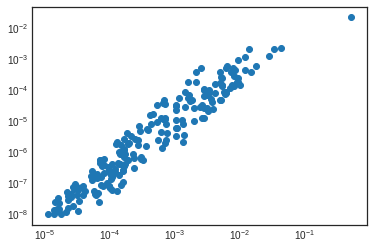

In [36]:
fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(features.mean(1),features.var(1))

# => issue: correlation between mean and variance !


# Log transforming the data

![Q](Q.png)

What is the big issue with log-transforms?

=> data with 0
=> trivial solution: pseudo-counts
(could be truely 0 or something you did not detect)

What to do about zeros in the counts table?

Empirical pseudo-count: use one order of magnitude smaller than the smallest detected value.

In [37]:
pseudo_count = features.values[features.values > 0].min()/10.
features = np.log10(pseudo_count + features)

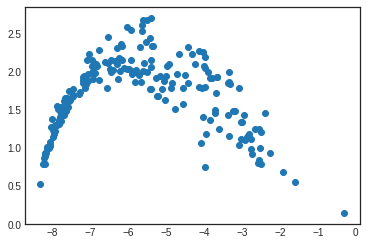

In [38]:
fig,ax = plt.subplots()
ax.scatter(features.mean(1), features.std(1))
# variance should be uniform everywhere, not perfect yet, but compared to previous plot, scale (y-axis) more compressed now
# before, standard variation varies greatly, now 5-fold range
# until pseudo-count not too large, does not really matter (divided by 10 or by 100, etc.)

Not, perfect, but look at the Y-axis scale: 0-3 (previously, it was over several orders of magnitude).

# Whitening the data

Finally, we "whiten" the data: remove the mean and make the standard deviation be 1.

In [39]:
# transpose the matrix
# in the matrix (microbial community) rows = features, columns are subjects
# but all ML functions use rows as samples and columns as features
features = features.T
features = (features - features.mean(0))/features.std(0)

Note we also transposed the matrix to a more natural format.

# Now, can we use a classifier to identify cancerous samples?

In [40]:
# samples collected before colonoscopy
# aim: non-invasive test with microbial fecal samples
labels = pd.read_table('http://www.bork.embl.de/~zeller/mlbc_data/FR-CRC_N114_label.tsv',
                               index_col=0, header=None, squeeze=True)
print(labels)

0
CCIS27304052ST-3-0    -1
CCIS15794887ST-4-0    -1
CCIS16561622ST-4-0    -1
CCIS79210440ST-3-0    -1
CCIS82507866ST-3-0    -1
CCIS98482370ST-3-0    -1
CCIS00281083ST-3-0    -1
CCIS32452666ST-4-0    -1
CCIS94417875ST-3-0    -1
CCIS27927933ST-4-0    -1
CCIS45571137ST-3-0    -1
CCIS81139242ST-4-0    -1
CCIS21126322ST-4-0    -1
CCIS17669415ST-4-0     1
CCIS29210128ST-4-0    -1
CCIS48725289ST-4-0     1
CCIS64785924ST-20-0   -1
CCIS03473770ST-4-0    -1
CCIS10706551ST-3-0    -1
CCIS64773582ST-4-0    -1
CCIS06260551ST-3-0     1
CCIS40244499ST-3-0     1
CCIS85214191ST-3-0     1
CCIS87167916ST-4-0     1
CCIS58234805ST-4-0     1
CCIS91228662ST-4-0     1
CCIS71301801ST-4-0     1
CCIS53355328ST-4-0     1
CCIS41222843ST-4-0     1
CCIS81887263ST-4-0     1
                      ..
CCIS02856720ST-4-0    -1
CCIS07648107ST-4-0    -1
CCIS34604008ST-4-0    -1
CCIS63468405ST-4-0    -1
CCIS16383318ST-4-0    -1
CCIS36699628ST-4-0    -1
CCIS95409808ST-4-0    -1
CCIS74239020ST-4-0    -1
CCIS05314658ST-4-0    -

In [41]:
raw_features = features
raw_labels = labels

# convert to array of numbers to pass them to ML function

features = raw_features.values
labels = raw_labels.values

In [42]:
features

array([[ 0.46563479, -0.74481671,  0.91154906, ...,  0.20023286,
         0.40298813,  0.39264468],
       [ 1.04639213, -0.74481671, -0.50341204, ...,  0.96096296,
         0.3730272 ,  1.63853631],
       [ 0.58280736,  0.7357094 ,  0.48887373, ..., -0.67143104,
        -0.51884139, -1.17892042],
       ..., 
       [-1.31911529, -0.74481671, -2.00925825, ...,  0.1877297 ,
         1.35509955,  1.25404391],
       [ 0.33243982, -0.74481671,  0.66283805, ..., -0.5637521 ,
        -0.18294858, -1.17892042],
       [ 0.13899591, -0.74481671, -0.62182288, ...,  1.24531988,
         1.1156768 ,  0.95205164]])

In [43]:
rf = ensemble.RandomForestClassifier(n_estimators=101)
# Inputs here are features and labels.
# By default here, the function splits into 3 groups
# 1st step: group1 left out, train on group2 and group3 => get prediction for group1
# do this for each fold
# => at the end, for each element: one single prediction for that element
# at every fold, one part of the data reserved for testing and trained on the rest
# you get at each fold a different model, for each element the prediction comes from the fold where not used for training
# every fold a different model => cross-validation won't tell how the model performs 
# (each time the model could be different) -> predict how well the whole process does

prediction = cross_validation.cross_val_predict(rf, features, labels)

# POSSIBLE ERROR: use cross-validation to both find paraemeters and estimate the error
# data used to assess the error: these data should never have been used to decide the parameters you include in the model
# develop the model in whatever data, then get new data and test the model on these data without being allowed to change 
# the model

In [44]:
cross_validation.cross_val_score?
# cross-validation: for each cross-validation, predicting by splitting and prediction
# by default, split the dataset in 3
# for each element of the input, you get cross-validated prediction 
#(when one element of the third was not part of the training)
# Here we use cross-validation to estimate the error
# You can also use cross-validation internally to find parameters.
# in Random Forest, not the issue to tune parameters. 
# If we have to tune parameters: 1st third as test (put aside), and training on the 2 other thirds. 
# As you need to set hyperparameters, so you do internal splits within the 2 thirds.

In [46]:
(prediction == labels).mean()
# here cross-validation to get the error (no parameters to tune)
# better than random

# in the paper: several cohorts (one cohort used to test only)
# here: we are working on a single cohort (we could have looked at another cohort for validation)


0.7807017543859649

![Q](Q.png) Actually, we did not need to normalize the features for a random forest! Why?
=> trees are threshold. if you rescale and renormalize the features, you are just moving the thresholds
but conceputally all what matters is the rank of the features. Normalized or not, you will ahve the same splits.

# Let's try other classifiers

What about a penalized logistic regression? 

In [49]:
clf = linear_model.LogisticRegressionCV()
# CV for cross-validation
lg_predictions = cross_validation.cross_val_predict(clf, features, labels)

# 2-level cross validation:
# 1) one level to get the accuracy
# 2) one to get the parameter tuning

linear.model.LogisticRegresionCV()
lg.fit(Trian_features, train_labels)
# has internally another layer



In [50]:
print((lg_predictions == labels).mean())

0.780701754386


In [51]:
lg_predictions


array([-1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1])

# Can we get a soft prediction?

Instead of just "the best guess", often it is useful to 

=> in some cases, better to have soft predictions rather than only healthy/cancer

aim: this test useful as a pre-screening (not for diagnostic) to get which people recommended to go to colonoscopy

In [52]:
# cross-validation in a loop
# prediction vector
# 3-fold cross-validation and shuffle=True => random
# each time in the loop we predict the probability
lg_predictions = np.zeros(len(labels), float)
for train, test in cross_validation.KFold(len(labels), n_folds=3, shuffle=True):
    clf.fit(features[train], labels[train])
    lg_predictions[test] = clf.predict_proba(features[test]).T[0]

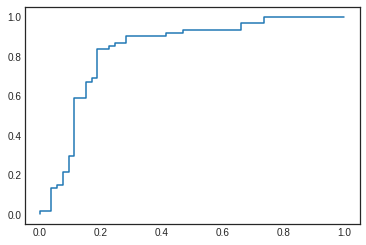

In [53]:
lg_fpr, lg_tpr,_ = metrics.roc_curve(labels, lg_predictions)
fig,ax = plt.subplots()
ax.plot(lg_tpr, lg_fpr)
# trade-off between 2 types of errors
# x-axis: false positive rate (1-specificity)
# y-axis: true positive rate (sensitivity)

![Q](Q.png) Do you understand what the curve above is?

# ROC Curves

X-axis: false positive rate, (1 -specificity), (how many objects that are classified as positive are actually negative?)

Y-axis: sensitivity, recall, true positive rate (how many objects that are positive are indeed classified as positive?)

## Alternative way to think about it:

1. Order all the examples by the classifier
2. Start at (0,0)
3. Go down the list of examples as ordered by the classifier
    - if true, go up
    - if false, go right
    
=> if random: random walk around the diagonal

Not all errors are the same: context matters.

# Area under the curve

AUC: 0.8283328178162698


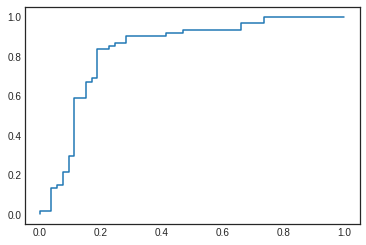

In [54]:
fpr, tpr,_ = metrics.roc_curve(labels, lg_predictions)
auc_roc = metrics.roc_auc_score(labels, -lg_predictions)
fig,ax = plt.subplots()
ax.plot(tpr, fpr)
print("AUC: {}".format(auc_roc))

In [58]:
# note on the cross_validation function
for train, test in cross_validation.KFold(len(labels), n_folds=3, shuffle=True):
    print(test)
# => each item appears once
# => each item is only once in the test set

for train, test in cross_validation.KFold(len(labels), n_folds=3, shuffle=True):
    print(train)

    # => at each cross-validation step, items that are not in the test set are in the train set 

[  4   5   9  12  24  25  28  29  40  42  45  46  47  48  58  59  61  63
  66  67  69  70  71  72  73  77  84  87  88  91  92  93  95 100 101 102
 103 110]
[  0   2   3   8  10  13  14  19  20  26  27  31  33  34  35  37  38  39
  41  44  51  53  54  64  68  74  76  79  83  90  94  97  99 105 106 108
 112 113]
[  1   6   7  11  15  16  17  18  21  22  23  30  32  36  43  49  50  52
  55  56  57  60  62  65  75  78  80  81  82  85  86  89  96  98 104 107
 109 111]
[  0   1   2   3   4   5   8   9  10  12  13  16  17  18  19  20  23  24
  25  29  31  33  38  39  40  41  42  43  46  47  49  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  67  68  70  71  73  74  75  77  78
  79  81  82  84  86  87  88  89  91  93  94  95  96  98 101 102 103 104
 107 109 111 112]
[  0   1   3   6   7   8   9  11  12  14  15  16  18  21  22  24  25  26
  27  28  30  31  32  33  34  35  36  37  39  41  44  45  46  48  49  50
  51  52  53  56  57  59  61  62  63  65  66  68  69  72  73  75  76  77
  7

In [69]:
# At each iteration of the loop build a new model only on the training set; no global model is obtained at the end
# Each time, completely indpendent model that dpends only on the training for that fold, 
# does not dpeend on what the test data is

# => this is what the cross_val_predict function does

# initialize array with zeros to store the results
cv_predictions = np.zeros_like(labels, dtype=float)
for train, test in cross_validation.KFold(len(labels), n_folds=3, shuffle=True):
    test_features = features[test]
    train_features = features[train]    
    train_labels = labels[train]
    
    # build new random forest object at each turn of the loop
    rf = ensemble.RandomForestClassifier(n_estimators = 101)
    # training:
    rf.fit(train_features, train_labels)
    print(rf.predict(test_features))
    
    # put them back in the right order as cv predictions arrive
    cv_predictions[test] = rf.predict(test_features)
    print(cv_predictions)

[ 1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1]
[ 1.  0.  0.  1. -1. -1.  0. -1.  0.  0.  0.  0. -1.  0.  0. -1.  0.  0.
 -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.
  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  0.  0. -1. -1.  0. -1.  1.  1.  0.  0.  0. -1.  1.  1. -1.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.
  0. -1.  0.  0. -1.  1. -1.  0.  0. -1. -1.  0.  0.  0. -1. -1.  0.  0.
 -1.  0.  0. -1.  0.  0.]
[-1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1
 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1]
[ 1. -1.  0.  1. -1. -1.  0. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0. -1.  1. -1. -1. -1.  0.
  1.  0.  1.  1.  0.  0.  1. -1.  0.  1.  0.  0. -1.  0. -1.  0.  1.  1.
  0.  1. -1. -1.  0. -1.  1.  1.  0. -1.  0. -1.  1.  1. -1. -1.  1.  1.
 -1.  1. -

In [66]:
# initialize array with zeros to store the results
# specify dtype=float to not have array of integers (otherwise only 0)
cv_predictions = np.zeros_like(labels, dtype=float)
for train, test in cross_validation.KFold(len(labels), n_folds=3, shuffle=True):
    test_features = features[test]
    train_features = features[train]    
    train_labels = labels[train]
    
    lg = linear_model.LogisticRegressionCV()
    lg.fit(train_features, train_labels)
    
    # put them back in the right order as cv predictions arrive
    # [:,0] to select the 1st col
    cv_predictions[test] = lg.predict_proba(test_features)[:,0]
    print(cv_predictions)
    
    # predict_proba => returns an array, with row = sample, each column= probability for each class (row sums to 1)

# => this is what the cross_val_predict function does 
# at each turn, fills 1/2 of cv_predictions array, at the end of last turn of the loop, the array is full

[ 0.          0.          0.          0.          0.          0.87631663
  0.          0.          0.          0.          0.          0.          0.
  0.          0.23803939  0.          0.          0.          0.          0.
  0.          0.32973015  0.          0.09457068  0.46138815  0.
  0.26153469  0.          0.          0.28412554  0.          0.          0.
  0.50654298  0.58483647  0.          0.          0.05867548  0.          0.
  0.          0.39865611  0.          0.52611401  0.          0.57841456
  0.          0.          0.          0.          0.          0.84598574
  0.03878411  0.          0.81070298  0.          0.          0.
  0.87976913  0.          0.          0.          0.          0.61297306
  0.12595618  0.          0.20896504  0.          0.          0.5830396
  0.54273619  0.          0.38027935  0.          0.24993067  0.          0.
  0.          0.36848689  0.          0.01312719  0.          0.          0.
  0.          0.66257408  0.75687657  0.    

# Biomarker discovery

We can use these models for biomarker discovery:

We use the models to infer which features are important (you probably talked about this yesterday).

Many classifiers can also output a feature relevance measure.

In [70]:
# sckikit convention, variables with _ at the end => results
#lg.linear_model.logisticRegressionCV()
#lg.fit(features, labels)
lg.coef_
# => coefficients of the logistic regression

# return the beta of the logistic regression
# here the normalization matters so that the parameters are on the same scale

# one would like to have a sparse model (e.g. for biological interpretation or to target sequencing)
# => use lasso as a sparse model

array([[ 0.01159447, -0.00958066,  0.0188671 ,  0.0156538 ,  0.01985786,
        -0.00791937,  0.04558313,  0.02742839,  0.04507423,  0.00658068,
        -0.00214437,  0.01901507,  0.0127704 ,  0.00370844,  0.0141947 ,
         0.01582166,  0.03313763,  0.03592584,  0.00434282,  0.01364426,
        -0.03112856, -0.00885427,  0.00319941,  0.00867382, -0.00898629,
         0.01902893,  0.00986389,  0.01560916,  0.01865892,  0.00197407,
        -0.00074457,  0.02891459,  0.00808254, -0.00731576, -0.00763581,
         0.03125949,  0.02415317, -0.02034159, -0.00016836,  0.0059977 ,
        -0.00333542,  0.00215832, -0.02004144, -0.00118469,  0.03397483,
         0.01598601, -0.02587471,  0.00428596, -0.00639765,  0.02989563,
        -0.0067538 , -0.02342417,  0.00170475, -0.01493665,  0.00430738,
        -0.00821245,  0.00672469,  0.0140125 ,  0.01416791, -0.02420997,
        -0.02210113,  0.0009481 , -0.01650801,  0.00102272,  0.00409197,
        -0.00020857, -0.00610107, -0.01604139, -0.0

# Lasso is sparse


sparse solution = many of the coefficients are zero (not small, exactly zero)

=> lasso is a penalized model   
lasso : penalizes by absolute value of the coefficients (ridge by squarred value)

possible problem with lasso: very very greedy; if 2 very similar features, will choose one feature over the other
even if almost identical (if one slightly better, will pick this one, even if not biological reason, 
just because of the dataset) in this sense, can be too greedy, too sparse (in this case, elastic-net can be better

lasso will throw aways some features => good for feature selection

if you care about sparsity: lasso
if just want accuracy: elastic-net likely to provide the best accuracy


relax lasso: do a lasso to select features, then do a second lasso again but only on these features
=> the second time you give a bigger budget (pre-selected set of features)

Blackboard diagram:

# Lasso in scikit-learn

In [71]:
# l1 penalty = lasso
clf = linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=100)

In [72]:
# extra hyperparameters: what are the penalties, what are the budget, etc.
# 100 iterations to estimate the parameters
clf.fit(features, labels)


LogisticRegressionCV(Cs=100, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [75]:
# sign of the coefficient: just dpeend what whas chosen as positive or negative class
# important just the value of the coefficeint, regardless of its sign
# select and get column names
feature_values = pd.Series(np.abs(clf.coef_).ravel(), index=raw_features.columns)

In [76]:
# sort by balues
feature_values.sort_values(inplace=True)

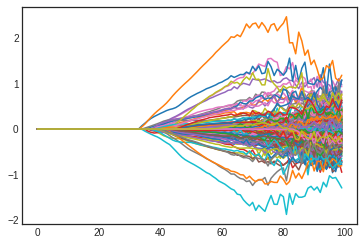

In [77]:
# we start with every value being zero 
# and pick some arrows and use them
# if we have illimited budget: we end up using all of them
fig,ax = plt.subplots()
_=ax.plot(clf.coefs_paths_[1].mean(0))
# x-axis: number of iterations (increasing budget)
# y-axis: coefficients
# if budget too small: everything zero
# when budget increases, everything comes to non-zero
# from the cross-validation, we get the best one (one of the 100) -> pick as the best one for the model


In [78]:
# not the value itself that is important here
# more the ranking 
feature_values

UNMAPPED                                                    0.000000
Parvimonas micra [h:1505]                                   0.000000
Roseburia hominis [h:1633]                                  0.000000
Pyramidobacter piscolens [h:1641]                           0.000000
Peptoniphilus lacrimalis [h:1492]                           0.000000
Mitsuokella multacida [h:1653]                              0.000000
Acidaminococcus intestini [h:1657]                          0.000000
Acidaminococcus fermentans [h:1658]                         0.000000
Campylobacter curvus [h:1723]                               0.000000
Pseudomonas aeruginosa [h:236]                              0.000000
Haemophilus parainfluenzae [h:326]                          0.000000
Haemophilus pittmaniae [h:327]                              0.000000
Enterobacter hormaechei/cloacae [c:384]                     0.000000
Lactobacillus fermentum [h:1454]                            0.000000
Lactobacillus casei [c:1452]      

# Comparing classifiers

So, which classifier is better?

Let's run the same evaluation scheme as before:

In [81]:
# compare if lasso better than random forest

rf = ensemble.RandomForestClassifier(n_estimators=101)
lasso_predictions = np.zeros(len(labels), float)
rf_predictions = np.zeros(len(labels), float)
for train, test in cross_validation.KFold(len(labels), n_folds=3, shuffle=True):
    clf.fit(features[train], labels[train])
    lasso_predictions[test] = clf.predict_proba(features[test]).T[0]
    rf.fit(features[train], labels[train])
    rf_predictions[test] = rf.predict_proba(features[test]).T[0]
  

Logistic regression (L2) AUC: 0.8283328178162698
Logistic regression (L1) AUC: 0.7841014537581193
RF AUC: 0.7995669656665636


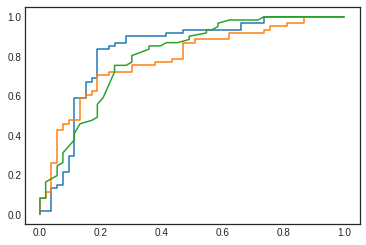

In [82]:
fig,ax = plt.subplots()

lg_fpr, lg_tpr,_ = metrics.roc_curve(labels, lg_predictions)
lg_auc_roc = metrics.roc_auc_score(labels, -lg_predictions)
ax.plot(lg_tpr, lg_fpr)
print("Logistic regression (L2) AUC: {}".format(lg_auc_roc))


la_fpr, la_tpr,_ = metrics.roc_curve(labels, lasso_predictions)
la_auc_roc = metrics.roc_auc_score(labels, -lasso_predictions)
ax.plot(la_tpr, la_fpr)
print("Logistic regression (L1) AUC: {}".format(la_auc_roc))

rf_fpr, rf_tpr,_ = metrics.roc_curve(labels, rf_predictions)
rf_auc_roc = metrics.roc_auc_score(labels, -rf_predictions)
ax.plot(rf_tpr, rf_fpr)
print("RF AUC: {}".format(rf_auc_roc))

# => very closed, L2 slightly better

# For a classifier, use Random Forests

Which classifier should I use?

=> basically, if you just want a classifier, use random forests

Extensive review: Random Forest and SVM that perform well. The authors recommend RF, even when not the best, never far away from the best. SVM sometimes slightly better but sometimes really worse. RF number one, and if not number one, very close to the top.

Also, RF does not require a lot of data preparation, no-preprocessing (no data transformation as it uses just thresholds). There are some hyperaparematers (how the tree has to be built, how to aggreate over the trees), but does not really impact. The only important parameter: how many trees you have, but is very robust (at least ~100 trees) (if choose large number, will converge). At least hundreds of trees, then will converge.
Different way to build and aggregate the trees, but is very robust in this respect.

In case very very big data, deep learning might be better.

Risk of overfitting: testing so many models that finally something comes out. 
In cross-validation, when testing models, one will come better than other just randomly. 
In the end, not fair evaluation of how the model performs.
If you try a bunch of things, something will be better, but not because better but because better for your data only.


Either having test set used only at the very very end (external validation) or by not trying to overoptimize.


For small to moderate sized problems, use Random Forests.

- _Do we Need Hundreds of Classifiers to Solve Real World Classification Problems?_ Manuel Fernández-Delgado, Eva Cernadas, Senén Barro, Dinani Amorim in [JMLR](http://www.jmlr.org/papers/v15/delgado14a.html)
- _I TRIED A BUNCH OF THINGS: THE DANGERS OF UNEXPECTED OVERFITTING IN CLASSIFICATION_ by Michael Skocik, John Collins, Chloe Callahan-Flintoft, Howard Bowman [BioRXiv preprint](http://biorxiv.org/content/early/2016/10/03/078816)

Other classifiers can have some advantages: Lasso is sparse, for example.

Let's continue looking at using the Lasso for biomarker discovery:

# Increasing the penalty makes the model sparser

We can also think of it as "decreasing the budget" of the classifier.

In [83]:
# if sparsity not favoured, we can force the sparsity;
# by decreasing budget or increasing the penalty
clf = linear_model.LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
clf.fit(features, labels)
feature_values = pd.Series(np.abs(clf.coef_).ravel(), index=raw_features.columns)
feature_values.sort_values(inplace=True)
feature_values

UNMAPPED                                                                         0.000000
Coprococcus catus [h:1594]                                                       0.000000
butyrate-producing bacterium [c:1595]                                            0.000000
Anaerostipes caccae [h:1596]                                                     0.000000
Eubacterium hallii [h:1597]                                                      0.000000
Clostridium bolteae [h:1598]                                                     0.000000
unnamed Clostridiales bacterium 1_7_47FAA [u:1599]                               0.000000
Clostridium symbiosum [h:1600]                                                   0.000000
Clostridium saccharolyticum [h:1601]                                             0.000000
unnamed butyrate-producing bacterium SS3/4 [u:1603]                              0.000000
Dorea formicigenerans [h:1604]                                                   0.000000
unnamed Cl

# Lasso is not very stable

If you subset the data, when features are very closed, the one that is chosen might changed.

Lasso is _winner takes all_.

Back to blackboard:

In [85]:
# As in the case of similar features, one of them might be chosen without specific reason (just depend on specific data),
# repeat the procedure with a subset of data at each turn to see how often a feature is chosen
# select samples with 90% probability each time
# fit the model
# get the coefficients for that model
# and look how often the feature is chosen

clf = linear_model.LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

fvalues = []
for _ in range(100):
    selected  = (np.random.random(len(features)) < 0.9)
    clf.fit(features[selected], labels[selected])
    feature_values = pd.Series(np.abs(clf.coef_).ravel(), index=raw_features.columns)
    fvalues.append(feature_values)
fvalues = pd.concat(fvalues, axis=1)

With the code above, we try the Lasso 100 times on different parts of the data (getting ~90% each time).

In [86]:
frac_selected =(fvalues > 0).mean(1)
frac_selected.sort_values(inplace=True)
frac_selected

# then at some point you will need to put a threshold to decide which features you select


UNMAPPED                                                                         0.00
unnamed Ruminococcaceae bacterium D16 [u:1580]                                   0.00
Eubacterium limosum [h:1582]                                                     0.00
Coprococcus eutactus [h:1592]                                                    0.00
unnamed Clostridium sp. L2-50 [u:1593]                                           0.00
Coprococcus catus [h:1594]                                                       0.00
Anaerostipes caccae [h:1596]                                                     0.00
Clostridium bolteae [h:1598]                                                     0.00
unnamed Clostridiales bacterium 1_7_47FAA [u:1599]                               0.00
Clostridium symbiosum [h:1600]                                                   0.00
Clostridium saccharolyticum [h:1601]                                             0.00
unnamed butyrate-producing bacterium SS3/4 [u:1603]   

# Final notes on CRC

- There is no causality model.
    - Maybe the tumour is a good environment for certain microbes
    - Maybe certain microbes cause cancer
    - Maybe people with subclinical symptoms subtly change their diet
    
The two first hypotheses are much more likely, but we cannot rule out the third.

## The same approach can be applied in other contexts

some important points:

choice of classifier, choice of feature normalization

sparsity of the lasso

trade-off sparse model vs. accuracy

BASICALLY:
- if only care about classification -> RF
- if only care about regression -> elastic-net

# Discovery of species using clustering


Metagenomics: take all the DNA, break into fragments for Illumina. Whatever reads you have, you don't know where it comes from. You don't even have reference genome for most of them.

Cluster of genes or contigs, so that contigs from the same organism ends up in the same cluster. 
People use the term of "binning" instead of "clustering".

Abundance correlation: if 2 genes are in the same species, they should go up and down with species abundance and should go up and down concordantly. Should allow some errors (not exactly coordinated, some sequencing errors).

Works well in practice.

Remember we have a jumble of genes and for many species (most in the open environment) we have no reference genomes.

Genes from the same species should correlate accross samples.

We can attempt to cluster together the genes from the same species!

## Many related approaches

- CAGs
- mOTUs
- ...

# We have several genes which we don't know where they belong


![](metagenomics-species-nbt.png)

![](nbt.2939-F1.jpg)

In [ ]:
K-means
    
2 dimensional space. Find the clusters: start by picking 2 guys as initial clusters.
Assign everyone to the 2 guys.
Iteration: recompute the mean location and restart the process.
    
stabilized if run enough time

Start by defining 2 guys (random seed)
Assign all the points to one of these 2 guys
Compute the mean of the values for each of the 2 guy
Next turn: take the mean to assign the values.


# Subspecies/strain Clustering

We can go one level deeper and cluster at below species level (subspecies/strain level).

![](subspecies-3a.png)

(Costea, Coelho, et al., in review)

In [ ]:
K-means to see how similar according to signature
bag of genes

![And now for something completely different](https://static1.squarespace.com/static/5342b8d7e4b0cc3fc1bc6079/t/577af0fe197aea2767b508bf/1467674907628/?format=500w)

# Tutorial 2

Load the metadata (sheet index 8 is the right one). The original data is at [http://ocean-microbiome.embl.de/companion.html](http://ocean-microbiome.embl.de/companion.html).

- data from all over the world

- build gene catalogs from the FASTQ files by taking the raw reads, assembling, predicting genes (more precisely ORFs)

- most genes are novel at 95% nucleotide identity

- samples collected at 3 different depths (with increasing depth, less light but more nutrients)

- first view of how things are structured: PCA

- organization by places or environments ?

- 1st PC correlates with temperature. E.g. can be used to predict temperature.

- use the R² to quantify predicted ~ observed

- from surface data: cannot disentangle temperature and oxygen apart. At the surface, temperature of the water almost perfectly determines the amount of dissolved oxygen.

- Look at the prediction strength for models built for the surface (resp. deeper) level; and validate it at the surface (resp. deeper) level. Prediction strength for the oxygen crashes when building model for surface and validate it for deepth. Temperature always predicted very well. Conclude that temperature is the main environmental correlate of taxonomic composition. 



In [107]:
tara_data = pd.read_excel('http://ocean-microbiome.embl.de/data/OM.CompanionTables.xlsx', sheetname=['Table W1', 'Table W8'], index_col=0)

/usr/local/lib/python3.5/dist-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [108]:
meta = tara_data['Table W8']
meta
#0.22⁻3 => things that go to 0.22 micron filter and blocked ad 3 micron filter

,Mean_Date [YY/MM/DD hh:mm]*,Mean_Lat*,Mean_Long*,Mean_Depth [m]*,Mean_Temperature [deg C]*,Mean_Salinity [PSU]*,Mean_Oxygen [umol/kg]*,Mean_Nitrates[umol/L]*,NO2 [umol/L]**,PO4 [umol/L]**,...,miTAG.SILVA.ace,miTAG.SILVA.Shannon,OG.Shannon,OG.Richness,OG.Evenness,FC - heterotrophs [cells/mL],FC - autotrophs [cells/mL],FC - bacteria [cells/mL],FC - picoeukaryotes [cells/mL],minimum generation time [h]
PANGAEA Sample ID,,,,,,,,,,,,,,,,,,,,,
TARA_B100000965,2011-04-15 13:10:00,-12.994483,-95.985500,57.622514,20.649431,35.544655,216.790338,1.501977,0.160,0.780,...,4229.796196,6.829191,7.247579,18464.5,0.737772,3.842760e+05,116140.61050,5.004166e+05,4501.337079,13.646311
TARA_B100000959,2011-04-16 16:09:00,-12.931623,-96.118510,175.256800,13.014573,34.840218,0.708430,21.068385,0.030,2.680,...,4685.670783,6.678287,7.230797,17447.9,0.740331,3.053193e+05,0.00000,3.053193e+05,0.000000,25.773105
TARA_B100000963,2011-04-15 13:10:00,-12.994483,-95.985500,5.479000,25.251200,35.835267,200.233917,4.590737,0.140,0.680,...,3458.745515,6.603492,7.165956,14283.0,0.749042,4.642672e+05,155789.06000,6.200562e+05,7779.900079,14.384453
TARA_B100000902,2011-04-22 19:51:00,-5.269667,-85.228733,45.659026,19.566255,34.900284,103.916711,20.328327,1.200,1.860,...,4111.077629,6.781489,7.171533,15878.3,0.741420,1.071414e+06,246946.86760,1.318361e+06,13381.733830,11.548857
TARA_B100000953,2011-04-22 14:16:00,-5.266542,-85.223467,475.619375,9.195825,34.692550,4.425250,40.008967,0.010,2.850,...,4642.517260,6.680479,7.187370,17457.4,0.735844,1.620192e+05,0.00000,1.620192e+05,0.000000,26.636844
TARA_B100000900,2011-04-21 20:16:00,-5.252333,-85.160983,5.478500,24.943108,34.748175,205.992583,11.688971,0.320,1.000,...,3092.856531,6.615300,7.134150,13566.0,0.749754,1.032721e+06,192334.72030,1.225056e+06,19090.560310,12.206568
TARA_R100001510,2011-05-13 00:00:00,2.076667,-84.520283,29.806808,26.532035,34.344808,203.127654,3.886605,0.110,0.500,...,NaN,NaN,NaN,NaN,NaN,8.242806e+05,155101.24960,9.793819e+05,4967.519697,NaN
TARA_B100000927,2011-05-13 00:00:00,2.076667,-84.520283,29.806808,26.532035,34.344808,203.127654,3.886605,0.110,0.500,...,3450.644848,6.675707,7.166900,15374.4,0.743419,8.242806e+05,155101.24960,9.793819e+05,4967.519697,13.326492
TARA_B100000929,2011-05-13 19:44:00,2.065494,-84.542422,376.367333,11.315800,34.799850,2.516667,33.915981,0.020,2.580,...,4926.656332,6.832155,7.292705,18991.5,0.740245,1.374867e+05,0.00000,1.374867e+05,0.000000,18.309217


Remove the non-data lines at the bottom:

In [109]:
# remove extra lines at the end that do not start with TARA
meta = meta.select(lambda ix: ix.startswith('TARA'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


Now, we need to do some ID manipulation

(Let's look at the tables in the supplement first, before we look at this obscure code)

In [110]:
# some ID manipulation, reassign the ID
samples = tara_data['Table W1']
pangea = samples['PANGAEA sample identifier']
meta.index = meta.index.map(dict([(p,t) for t,p in pangea.to_dict().items()]).get)

A lot of bioinformatics is just converting file types and identifiers.

We are going to focus on the surface samples, in the prokaryotic size fraction:

In [111]:
meta = meta.select(lambda sid: '_SRF_' in sid)

# select prokaryotes based on which filters that went through
meta = meta.select(lambda sid: '0.22-3' in sid or '0.22-1.6' in sid)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  after removing the cwd from sys.path.


# Taxonomic tables

In [112]:
raw_mOTUs = pd.read_table('http://ocean-microbiome.embl.de/data/mOTU.linkage-groups.relab.release.tsv',
                      index_col=0)
mOTUs = raw_mOTUs.copy()

Get just the relevant rows:

In [113]:
mOTUs

,TARA_018_DCM_0.22-1.6,TARA_018_SRF_0.22-1.6,TARA_023_DCM_0.22-1.6,TARA_023_SRF_0.22-1.6,TARA_025_DCM_0.22-1.6,TARA_025_SRF_0.22-1.6,TARA_030_DCM_0.22-1.6,TARA_030_SRF_0.22-1.6,TARA_031_SRF_0.22-1.6,TARA_032_DCM_0.22-1.6,...,TARA_085_MES_0.22-3,TARA_085_SRF_0.22-3,TARA_093_DCM_0.22-3,TARA_093_SRF_0.22-3,TARA_094_SRF_0.22-3,TARA_096_SRF_0.22-3,TARA_098_DCM_0.22-3,TARA_098_MES_0.22-3,TARA_098_SRF_0.22-3,TARA_099_SRF_0.22-3
mOTU_linkage_group,,,,,,,,,,,,,,,,,,,,,
unassigned,0.143654,0.147022,0.184291,0.298214,0.096961,0.320504,0.158139,0.392746,0.157887,0.131030,...,0.313221,0.931547,0.306451,0.366307,0.280027,0.304664,0.168686,0.186912,0.279590,0.295474
motu_linkage_group_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
motu_linkage_group_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
motu_linkage_group_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
motu_linkage_group_7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000237,0.000175,0.000360,0.000320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
motu_linkage_group_10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
motu_linkage_group_11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001790,0.000000,0.000000,0.000000
motu_linkage_group_12,0.000037,0.000000,0.001104,0.001694,0.000028,0.002415,0.000170,0.001367,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
motu_linkage_group_14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [114]:
# take only the index with care about
mOTUs = mOTUs[meta.index]

In [115]:
mOTUs.shape

(1441, 63)

Select abundant ones

In [116]:
# select only features with minimal amont
mOTUs = mOTUs[mOTUs.max(1) > 1e-2]

In [117]:
(mOTUs > 0).mean().mean()

0.50559074204394416

Transpose

In [118]:
mOTUs = mOTUs.T

In [119]:
print(mOTUs.shape)

(63, 203)


# PCA Plot

- Principal component analysis (PCA)
- Principal coordinate analysis (PCoA)
- Multidimensional analysis (MDS)
- Multidimensional non-euclidean analysis

I.e., if $x_i$, $x_j$ are the original (high dimensional) vectors, and $p_i$, $p_j$ are their transformed counterparts (low dimensional), then

$|x_i - x_j| \approx |p_i - p_j|$

PCA is one of the simplest methods, very classical (matrix operations) and very deep (shows up in many forms). 


PCA equivalent to PCoA using Euclidean distance.

High-dimensional vectors (in our case > 200 samples), we want to project to low dimensiosn so that original high dimension equivalent at lower dimensions

Methods differ in what distances they use at input.


[Wikipedia article on PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)

![PCA](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/330px-GaussianScatterPCA.svg.png)

# PCA in scikit-learn

In [120]:
from sklearn import decomposition
# in () is the number of dimensions
pca = decomposition.PCA(2)

We can perform it in a single call:

In [121]:
pca_decomp = pca.fit_transform(mOTUs)

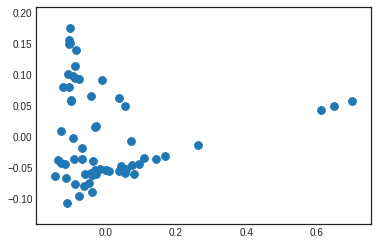

In [122]:
fig,ax = plt.subplots()
ax.scatter(pca_decomp.T[0], pca_decomp.T[1], s=60)

# Adding metadata to the plot

In [123]:
regions = samples['Ocean and sea regions (IHO General Sea Areas 1953) [MRGID registered at www.marineregions.com]']
regions = regions.reindex(meta.index)
regions = pd.Categorical(regions)

In [124]:
COLORS = np.array([
    '#7fc97f',
    '#beaed4',
    '#fdc086',
    '#ffff99',
    '#386cb0',
    '#f0027f',
    '#bf5b17',
    '#666666',    
])

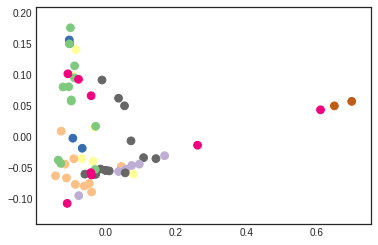

In [125]:
fig,ax = plt.subplots()
ax.scatter(pca_decomp.T[0], pca_decomp.T[1], c=COLORS[regions.codes],s=60)

=> different from what we have seen in the paper !

Data have not been normalized.

Hmm. We "forgot" to log transform.

What is the largest feature?

In [128]:
mOTUs.mean()
# the unassigned fraction: very bigger than all other => will dominate everything

mOTU_linkage_group
unassigned                 0.234525
motu_linkage_group_40      0.001807
motu_linkage_group_43      0.000547
motu_linkage_group_133     0.000256
motu_linkage_group_178     0.000287
motu_linkage_group_206     0.003380
motu_linkage_group_211     0.008728
motu_linkage_group_212     0.017338
motu_linkage_group_214     0.013560
motu_linkage_group_220     0.005273
motu_linkage_group_231     0.000394
motu_linkage_group_235     0.004250
motu_linkage_group_237     0.012419
motu_linkage_group_247     0.016793
motu_linkage_group_248     0.005544
motu_linkage_group_259     0.000477
motu_linkage_group_265     0.009274
motu_linkage_group_268     0.000718
motu_linkage_group_277     0.002567
motu_linkage_group_301     0.001725
motu_linkage_group_304     0.000555
motu_linkage_group_314     0.001693
motu_linkage_group_315     0.009675
motu_linkage_group_318     0.002635
motu_linkage_group_320     0.005204
motu_linkage_group_321     0.004397
motu_linkage_group_330     0.005612
motu_link

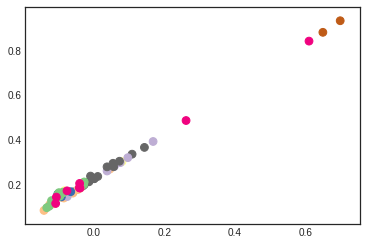

In [130]:
fig,ax = plt.subplots()
# to get the unassigned for all samples: first column, take first row of the transpose 
# s = 60 => size of the dots
ax.scatter(pca_decomp.T[0], mOTUs['unassigned'], c=COLORS[regions.codes],s=60)

# x-axis fraction of unassinged, y-axis=PC1
# => basically the PC1 reflects the percent of unassigned

# (organisms responsible for most of the mass, responsible for most of the projections)

# => it is hidding a lot of internal variance


So, yeah, without log-normalization, PC1 is almost completely determined by the single largest element.

In our case, this is even worse, because the largest element is the unassigned fraction!

In [131]:
# determine the pseudocounts to avoid the log of 0
pc = mOTUs.values[mOTUs.values > 0].min() / 10.
mOTUs = np.log10(mOTUs + pc)

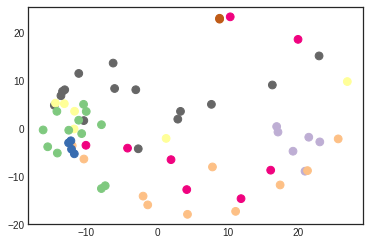

In [132]:
pca_decomp = pca.fit_transform(mOTUs)
fig,ax = plt.subplots()
ax.scatter(pca_decomp.T[0], pca_decomp.T[1], c=COLORS[regions.codes],s=60)

# 203 dimension, projected onto 2

# Explained variance in PCA

It is, in general, impossible to get a perfect low dimensional representation of a high dimensional space

=> assess how good the variance is

Text(0,0.5,'Explained variance: 17.1%')

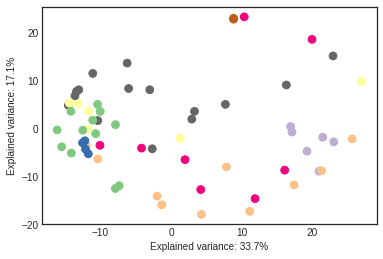

In [135]:
pca_decomp = pca.fit_transform(mOTUs)
fig,ax = plt.subplots()
ax.scatter(pca_decomp.T[0], pca_decomp.T[1], c=COLORS[regions.codes],s=60)
ax.set_xlabel('Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[0]))
ax.set_ylabel('Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[1]))

# in most cases, good if explained variance of first two PC > 50%

You **always want to the explained variance**.

Ideally, 50% or more should be explained by the two axes.

# Correlation of temperature with PC1

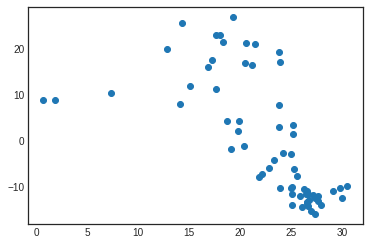

In [136]:
fig,ax = plt.subplots()
temperature = meta['Mean_Temperature [deg C]*']
ax.scatter(temperature, pca_decomp.T[0])

We can check with standard statistics that this is indeed a strong correlation:

In [138]:
from scipy import stats
stats.spearmanr(temperature, pca_decomp.T[0])

# PCA totally unsupervised, but good correlation with temperature

SpearmanrResult(correlation=-0.82814900153609838, pvalue=5.6204853798973491e-17)

# How about predicting temperature?



### Regression, not classification

We are predicting a continuous output, not just a single class.

Feature matrix, features for each matrix.

Similar to cancer data, but here the output is continuous.

The continuous output here is the temperature.

=> regression not classification

Penalized regression: good when more features than samples

# Elastic net regression

OLS: $\beta = \arg\min | \beta X - y |^2$

Lasso: $\beta = \arg\min | \beta X - y |^2 + \alpha |\sum_i\beta_i|$

Ridge: $\beta = \arg\min | \beta X - y |^2 + \alpha |\sum_i\beta_i|^2$

Elastic net: $\beta = \arg\min | \beta X - y |^2 + \alpha_1 |\sum_i\beta_i| + \alpha_2 |\sum_i\beta_i|^2$

Ideally, elastic net is a "soft Lasso": still sparse, but not as greedy.

Still sparse, but not as greedy. If 2 things almost the same, if one just little better lasso will pick only one, elastic net will use budget equally between the 2. If something totally in the other region, discarded also by elastic net.

**If you just want a regression method, _use elastic nets_.**

For a regression, elastic net should be the first choice.

# Feature normalization

We use much of the same procedure as before, except we used _a different normalization_: rank transform.
    

In [141]:
# rank transformation for each of the subject
# for each subject, number 1 is the most abundundant feature
from scipy import stats
ranked = np.array([stats.rankdata(mOTUs.iloc[i]) for i in range(len(mOTUs))])

In [149]:
# robust to any type of scaling (what ever small is the smallest value, will have the same rank)
data = np.array([1,2,5,3,0])
stats.rankdata(data)
# rankdata gives the ranks of the elements in the array
# in practice, rank transformation seems more robust than other kind of transformation to things like batch effects

# may have often lot of ties as lot of 0 -> typical solution: all the same low rank


array([ 2.,  3.,  5.,  4.,  1.])

In [143]:
# elastic net has some hyperparameters (2 penalty parameters)
# internal loop of cross-validation

predictor = linear_model.ElasticNetCV(n_jobs=4)

cv = cross_validation.LeaveOneOut(len(temperature))
# cross-validation predict
prediction = cross_validation.cross_val_predict(predictor, ranked, temperature, cv=cv)

# leave-one-out cross-validation: 
# every time 1 single subject out, train on anybody else, and repeat for each object

# !!! SHOULD NOT DO LEAVE-ONE-OUT CROSS VALIDATION !!! (SEE BELOW)
# inflated R² value

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

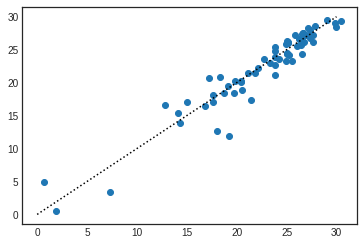

In [144]:
fig,ax = plt.subplots()
ax.scatter(temperature, prediction)
ax.plot([0,30], [0,30], 'k:')

In [145]:
print("R2: {}".format(metrics.r2_score(temperature, prediction)))

# The value is good because high, but is inflated (see below)


R2: 0.8996858093687399


In [146]:
predictor

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=4,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

# R² as a measure of prediction

- R²_CV_ or R² or Q² or Coefficient of Determination: nomenclature is not 100% standard.
- It's variance explained.
- Alternatively: it's the improvement over a _null model_.

It can be negative!


$R^2 = 1 - \frac{\sum_i | y_i - \hat{y}_i|^2}{\sum_i |y_i - \bar{y}|^2}$

It can be very sensitive to outliers!

1 minus how well our model performs divided by how an uninformative model performs (model that predicts mean values)

Good if the data are well distributed, but can be misleading if outliers ! 
(in the two directions: "bad outliers" can make R² look bad when model is not; 
"good outliers" can make R² looks good even when model bad)

They are some outliers in the temperatures (have been removed in the paper)

# What about spatial auto-correlation?

![Q](Q.png) What is spatial auto-correlation?

For now, samples are treated as independent samples. But samples that are very close, are not independent (similar temperature, etc.) => they are not independent samples.

Test set should be independent from training set. But if take samples that are close spatially, there is no independance.

(here space is the issue, in other scenarios time can be an issue for example).

![Q](Q.png) How do we solve the issue of spatial auto-correlation?

=> Ocean-one-out cross-validation: take all the samples from one ocean out, train on all samples from other oceans and validate with the samples from one ocean.

Other possible way:  take some samples from one ocean, draw exclusion zone around them and use for trainning all samples that are out of the exclusion zone (leave-one-out with an exclusion zone around it).

Meta-analysis: if data from different studies => cross-validation by studies.

Nice with this type of cross-validation: no modeling. No need for complicated model of how geogrpahy influences temperature and you correct for that, etc.. No need for model of what batch effects are.

# Cross-validation as a solution to auto-correlations

- Cross-validation can be a very powerful scientific tool

http://luispedro.org/files/Coelho2013_Bioinformatics_extra/crossvalidation.html

In [147]:
# give a set of labels (here is the list of regions)
# cross-validate in a way that each time it leaves a label out

cv = cross_validation.LeaveOneLabelOut(labels=regions)
prediction = cross_validation.cross_val_predict(predictor, ranked, temperature, cv=cv)
print("R2: {}".format(metrics.r2_score(temperature, prediction)))

# drop a bit the R², but is now more robust

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


R2: 0.7886110881104633


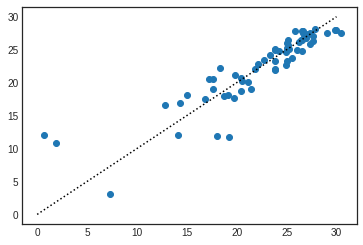

In [148]:
fig, ax = plt.subplots()
ax.scatter(temperature, prediction)
ax.plot([0,30], [0,30],'k:')

# now the outliers (2 points on the left; most southern points) are not doing as well as previously
# more conservative

# model will tend to push things towards the mean 
# at the top also, some other small "outliers" (on the right) 

# Regression to the mean in penalized linear models

Models will often regress to the mean.

This is OK.

=> for the things very far way, the model will not be confident for predicting it
the coldes and warmest points: misspredicted, predictions pushed towards the mean

# Be very careful with group/batch effects

- They are pervasive
- They can kill your generalization
- They can trick you into thinking your system works better than it does


References

- _Determining the subcellular location of new proteins from microscope images using local features_ by Coelho et al. (2013) Bioinformatics [DOI: 10.1093/bioinformatics/btt392](http://bioinformatics.oxfordjournals.org/content/29/18/2343.short)
- _Assessing and tuning brain decoders: Cross-validation, caveats, and guidelines_ by Varoquaux et al. NeuroImage (2016) [DOI: 10.1016/j.neuroimage.2016.10.038](http://www.sciencedirect.com/science/article/pii/S105381191630595X)


# Problem: can we build a model that can generalize across studies?

Big issues

- Not the same technology (Illumina vs 454 and different library preps)
- Not the same sequencing depth

![Q](Q.png) Suggestions?

Venter data: lower sequencing depth (fewer reads)

=> downsample and only use presence/absence data.

Here is what we did: 

1. Downsample (randomly) our data to the GOS depth
2. Only used presences/absence (encoded as 0.0/1.0)

Worked well.

Select reads randomply up to the point to end up with the same number of reads they have in the previous study 
(stochastically downsample reads)

Differences in technologies: our estimates of the abunduances and their estimates of abundances are very different, but detection vs. no detection is more robust.

Questions before we switch topics again?